In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings(action="once")
from multiprocessing import Pool

sns.set_style(
    "darkgrid",
    {
        "xtick.top": True,
        "ytick.right": True,
        "xtick.bottom": True,
        "ytick.left": True,
        "grid.linestyle": "--",
        "image.cmap": "viridis",
        "xtick.direction": "in",
        "ytick.direction": "in",
    },
)

# @working path
FIG_PATH = "../tex/figs/"
WEB_FIG_PATH = "../tex/web-figs/"
DATA_PATH = "../code/"


# @global settings

FIG_DPI = 800
FIG_EXT = ".pdf"

# @global functions
def savefig(handler, name, fig_ext=FIG_EXT):
    if name != "":
        handler.savefig(
            FIG_PATH + name + fig_ext, dpi=FIG_DPI, bbox_inches="tight", pad_inches=0.1
        )


def parallelize_dataframe(n_cores, func, df, *args):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.starmap(func, [(d, *args) for d in df_split]))
    pool.close()
    pool.join()
    return df


def parallelize(n_cores, func, splited_data, *args):
    pool = Pool(n_cores)
    df = pool.starmap(func, [(d, *args) for d in splited_data])
    pool.close()
    pool.join()
    return df

Populating the interactive namespace from numpy and matplotlib


In [2]:
def draw_errors(data, method):
    test_num = len(data)
    fig = plt.figure(figsize=(4, 3))
    ax = fig.add_subplot(1, 1, 1)
    for d, m in zip(data, method):
        ax.plot(d["time"], np.abs(d["$E_{tot}$"]), "-.", lw=1, label=m)
        ax.set_yscale("log")
        ax.set_xlabel("time")
        ax.set_ylabel("$\Delta E$")
        print(np.abs(d["$E_{tot}$"]).mean())
    ax.legend()

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:9: DeprecationWarning: invalid escape sequence \D


1.3544277144013592e-09
8.663580917519768e-10
8.68518929410315e-12
1.9017135816897025e-12


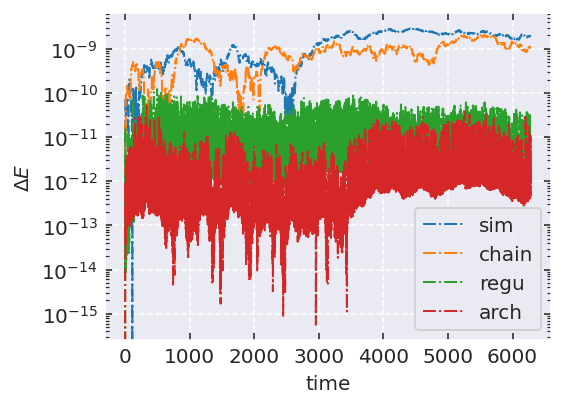

In [3]:
 method = ['sim', 'chain', 'regu', 'arch']
#method = ["simple"]
fnames = ["build/two-body-" + m + ".err" for m in method]
data = [pd.read_csv(name, names=["time", "$E_{tot}$"]) for name in fnames]
draw_errors(data, method)
# print(data)

In [ ]:
fnames = ["cmake-build-debug/ecc-BS-" + m + ".err" for m in method]
data = [pd.read_csv(name, names=["time", "$E_{tot}$"]) for name in fnames]
draw_errors(data, method)

In [ ]:
do = (energy["omega"] - energy["omega"][0]) / energy["omega"][0]
plt.plot(energy["time"], do, "-", lw=1)

In [ ]:
from decimal import *

getcontext().prec = 44

sub_steps = [
    "0",
    "0.0562625605369221464656521910318",
    "0.180240691736892364987579942780",
    "0.352624717113169637373907769648",
    "0.547153626330555383001448554766",
    "0.734210177215410531523210605558",
    "0.885320946839095768090359771030",
    "0.977520613561287501891174488626",
    "1",
]
p_step = [Decimal(h) for h in sub_steps]


def gen_c(p_step):
    l = []
    size = len(p_step)
    for i in range(size):
        x = []
        for j in range(i):
            x.append(Decimal(1))
            for k in range(len(x)):
                x[k] = x[k] / (p_step[i] - p_step[j])
        l.append(x)

    return l


def gen_r(p_step):
    l = []
    size = len(p_step)
    for i in range(size):
        x = []
        for j in range(i):
            x.append(1 / (p_step[i] - p_step[j]))
        l.append(x)

    return l


l = gen_r(p_step)

for i in p_step:
    print("{:.18E}".format(i), ",", end="")

for i in l:
    for x in i:
        print("{:.18E}".format(x), ",", end="")
    print("\n")


pos_cof = [
    Decimal(1.0),
    Decimal(1) / Decimal(2),
    Decimal(1) / Decimal(3),
    Decimal(1) / Decimal(2),
    Decimal(3) / Decimal(5),
    Decimal(2) / Decimal(3),
    Decimal(5) / Decimal(7),
    Decimal(3) / Decimal(4),
    Decimal(7) / Decimal(9),
]
vel_cof = [
    Decimal(1.0),
    Decimal(1) / Decimal(2),
    Decimal(2) / Decimal(3),
    Decimal(3) / Decimal(4),
    Decimal(4) / Decimal(5),
    Decimal(5) / Decimal(6),
    Decimal(6) / Decimal(7),
    Decimal(7) / Decimal(8),
]


def tab(h, cof):
    s = 1
    for x in cof:
        print("{:.18E}".format(s * x * h), ",", end="")
        s *= x * h


for p in p_step:
    if p != 0:
        print(Decimal(1) / p)


for p in p_step:
    tab(p, vel_cof)
    print("\n")

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


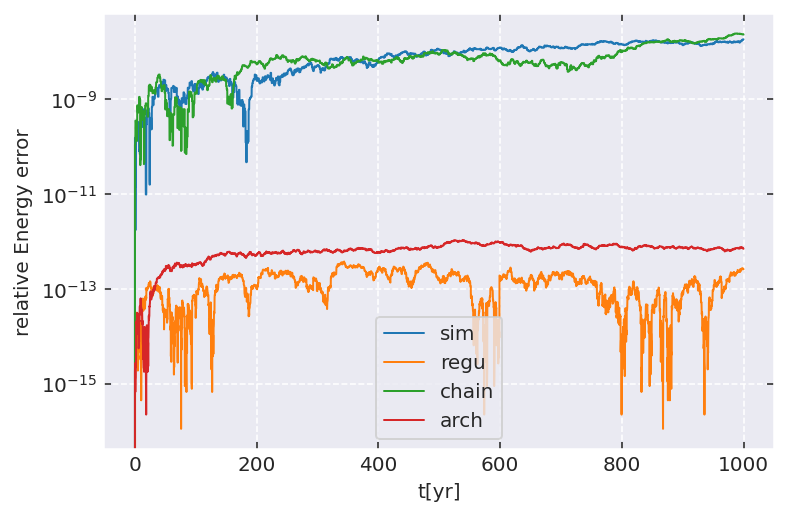

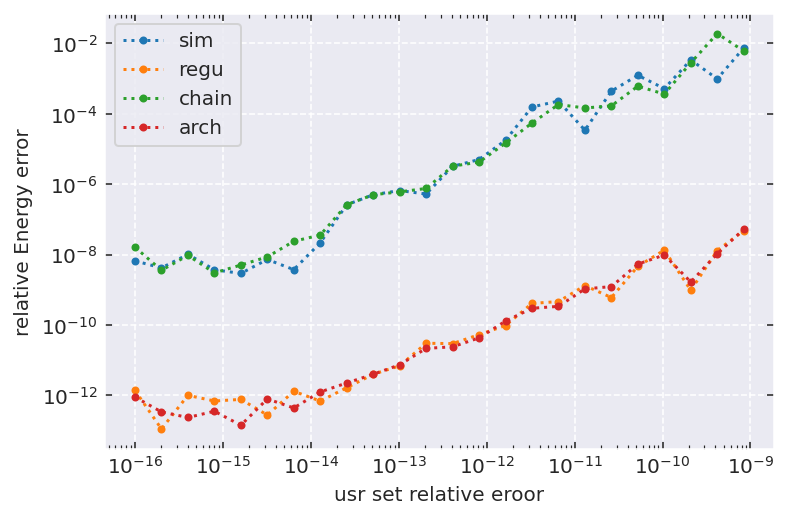

In [156]:
#sim_name = "test/regression_test/earth-system"
sim_name = "build/two-body"
#sim_name = "build/earth-system"
#sim_name = "test/regression_test/kozai"
sim_suffix = ["sim", "regu", "chain", "arch"]

#sim_suffix = ["regu", "arch"]

fname = [sim_name + "-" + s for s in sim_suffix]

t_err = [np.loadtxt(f + ".err", delimiter=",") for f in fname]

err_scale = [np.loadtxt(f + ".scale") for f in fname]

fig = plt.figure()
for te, name in zip(t_err, sim_suffix):
    plt.plot(
        te[:, 0] / np.pi / 2, np.abs(te[:, 1]), "-", label=name, lw=1, markersize=1
    )
    plt.yscale("log")
    plt.xlabel("t[yr]")
    plt.ylabel("relative Energy error")
plt.legend()
#plt.xlim([180,190])
#plt.savefig('DKD-err.png',dpi=192,bbox_inches='tight')

fig = plt.figure()
for e, name in zip(err_scale, sim_suffix):
    plt.plot(e[0, :], np.abs(e[1, :]), '.:',label=name)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("usr set relative eroor")
    plt.ylabel("relative Energy error")
plt.legend()
#plt.savefig('DKD-scale.png',dpi=192,bbox_inches='tight')